In [1]:
%pylab notebook
from numpy.random import normal as G
from pycheops.models import FactorModel, TransitModel 
from lmfit import report_fit


Populating the interactive namespace from numpy and matplotlib


In [2]:
T_0 = 0.0
P = 2.0
D = 0.08  # Transit Depth
W = 0.02  # Transit Width
S = 0.2  # Transit Shape
c = 10    # Flux outside transit
h_1 = 0.8
h_2 = 0.7

In [3]:
m = FactorModel()*TransitModel()
pars = m.make_params(T_0=T_0, D=D, W=W, S=S, h_1=h_1, h_2=h_2, c=c)
pars['P'].set(value=P, vary=False)
pars['f_c'].set(value=0, vary=False)
pars['f_s'].set(value=0, vary=False)
pars['h_2'].set(vary=False)
pars

Parameters([('c', <Parameter 'c', 10, bounds=[-inf:inf]>),
            ('T_0', <Parameter 'T_0', 0.0, bounds=[-inf:inf]>),
            ('P', <Parameter 'P', value=2.0 (fixed), bounds=[1e-15:inf]>),
            ('D', <Parameter 'D', 0.08, bounds=[0:1]>),
            ('W', <Parameter 'W', 0.02, bounds=[0:0.3]>),
            ('S', <Parameter 'S', 0.2, bounds=[0:1]>),
            ('f_c', <Parameter 'f_c', value=0 (fixed), bounds=[-1:1]>),
            ('f_s', <Parameter 'f_s', value=0 (fixed), bounds=[-1:1]>),
            ('h_1', <Parameter 'h_1', 0.8, bounds=[0:1]>),
            ('h_2', <Parameter 'h_2', value=0.7 (fixed), bounds=[0:1]>),
            ('k',
             <Parameter 'k', 0.282842712474619, bounds=[0:1], expr='sqrt(D)'>),
            ('aR',
             <Parameter 'aR', 18.926819071273506, bounds=[1:inf], expr='2/(pi*W*sqrt((1-S)/k))'>),
            ('rho',
             <Parameter 'rho', 22.743677466124154, bounds=[0:inf], expr='0.013418*aR**3/P**2'>),
            ('b',
      

/Users/pflm/Documents/GitHub/pycheops/pyvenv/lib/python3.6/site-packages/pycheops-0.1.5-py3.6.egg/pycheops/models.py:208: UserWarning: qpower2 is untested/inaccurate for values of k > 0.2
  return qpower2(z, k, c2, a2)


<IPython.core.display.Javascript object>


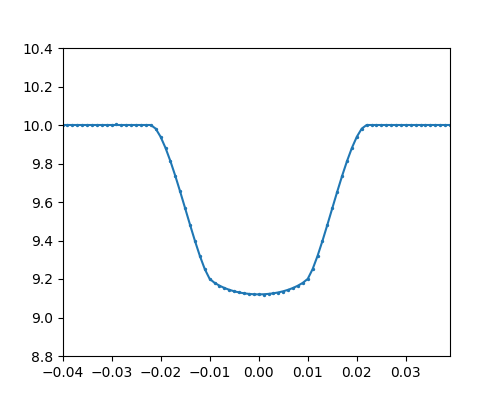

(8.8, 10.4)

In [4]:
t = np.arange(-W*P,W*P, 0.001)
yerr = 150e-6

flux_true = m.eval(params=pars, t=t) 
flux = flux_true + pars['c']*G(0.0, yerr, size=len(t))

fig,ax=subplots(1,1,figsize=(5,4))
ax.plot(t, flux_true)
ax.scatter(t, flux,s=2)
ax.set_xlim(min(t),max(t))
ax.set_ylim(c*(1-1.5*D),c*(1+ 0.5*D))

In [5]:
from pycheops.funcs import transit_width
help(transit_width)

Help on function transit_width in module pycheops.funcs:

transit_width(r, k, b, P=1)
    Total transit duration.
    
    See equation (3) from Seager and Malen-Ornelas, 2003ApJ...585.1038S.
    
    :param r: R_star/a
    :param k: R_planet/R_star
    :param b: impact parameter = a.cos(i)/R_star
    :param P: orbital period (optional, default P=1)
    
    :returns: Total transit duration in the same units as P.



In [5]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 160
    # variables        = 6
    chi-square         = 14339.0534
    reduced chi-square = 93.1107365
    Akaike info crit   = 731.290926
    Bayesian info crit = 749.741969
[[Variables]]
    c:    10.0001686 +/- 1.6790e-04 (0.00%) (init = 10)
    T_0:  7.3397e-06 +/- 5.9591e-06 (81.19%) (init = 0)
    P:    2 (fixed)
    D:    0.08005859 +/- 9.5233e-05 (0.12%) (init = 0.08)
    W:    0.04002977 +/- 2.3333e-05 (0.06%) (init = 0.04)
    S:    0.19923986 +/- 9.7429e-04 (0.49%) (init = 0.2)
    f_c:  0 (fixed)
    f_s:  0 (fixed)
    h_1:  0.80007874 +/- 0.00233202 (0.29%) (init = 0.8)
    h_2:  0.7 (fixed)
    k:    0.28294627 +/- 1.6829e-04 (0.06%) == 'sqrt(D)'
    aR:   9.45361149 +/- 0.01028074 (0.11%) == '2/(pi*W*sqrt((1-S)/k))'
    rho:  2.83413835 +/- 0.00000000 (0.00%) == '0.013418*aR**3/P**2'
    b:    0.48224760 +/- 0.00178299 (0.37%) == 'sqrt(((1-k)**2-S*(1+k)**2)/(1-S))'
[

/Users/pflm/Documents/GitHub/pycheops/pyvenv/lib/python3.6/site-packages/pycheops-0.1.5-py3.6.egg/pycheops/models.py:208: UserWarning: qpower2 is untested/inaccurate for values of k > 0.2
  return qpower2(z, k, c2, a2)


In [ ]:
result.plot(xlabel='Time',ylabel='Flux')